In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sys

from scipy.stats import spearmanr

# import utils
sys.path.append("../../../utils")
from plotting_utils import *
from classify_utils import *

%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
# mpl.rcParams['figure.autolayout'] = False

In [2]:
sns.set(**PAPER_PRESET)
fontsize = PAPER_FONTSIZE

In [3]:
np.random.seed(2019)

In [4]:
QUANT_ALPHA = 0.05

## functions

## variables

In [5]:
data_dir = "../../../data/02__mpra/02__activs"
alpha_f = "%s/alpha_per_elem.quantification.txt" % data_dir
human_vals_f = "%s/human_TSS_vals.both_tiles.txt" % data_dir
mouse_vals_f= "%s/mouse_TSS_vals.both_tiles.txt" % data_dir

In [6]:
native_f = "%s/native_results.txt" % data_dir
HUES64_cis_f = "%s/HUES64_cis_results.txt" % data_dir
mESC_cis_f = "%s/mESC_cis_results.txt" % data_dir
human_trans_f = "%s/human_trans_results.txt" % data_dir
mouse_trans_f = "%s/mouse_trans_results.txt" % data_dir
cis_trans_int_f = "%s/cis_trans_interaction_results.txt" % data_dir

In [7]:
tss_map_f = "../../../data/01__design/01__mpra_list/mpra_tss.with_ids.RECLASSIFIED_WITH_MAX.txt"

In [8]:
#align_f = "../../../misc/00__tss_metadata/tss_map.seq_alignment.txt"

In [9]:
#cage_data_f = "../../../misc/00__tss_metadata/All_TSS_and_enh.CAGE_grouped_exp.tissue_sp.txt.gz"

## 1. import data

In [10]:
alpha = pd.read_table(alpha_f, sep="\t").reset_index()
alpha.head()

,index,HUES64,mESC,HUES64_pval,mESC_pval,HUES64_padj,mESC_padj
0,AAAAAAAAAAAAAAAAACCCTGCAGAGAGCCTGCAAAGTCACTGCC...,7.295239,6.315911,2.825214e-75,1.383066e-42,4.596852e-74,1.878236e-41
1,AAAAAAAAAAAAAAAGAAAAGAAAAGAAAAAAAAGAAAGGATTGAG...,1.326796,1.348824,1.451021e-01,2.326515e-01,3.319934e-01,5.455262e-01
2,AAAAAAAAAAAAGAGGAGAAATAGATTGTTACCTTATATTATTTAA...,0.977164,1.548916,4.814953e-01,1.057092e-01,7.164347e-01,3.127558e-01
3,AAAAAAAAAACCGGCAAAATGTCCTTTTCCTTGTTTTGAAAAGACT...,0.976127,0.818171,4.826910e-01,7.414048e-01,7.167637e-01,8.145300e-01
4,AAAAAAAAAGGCCACGCTCAAAACCCCAGACTAGTTTTCCTCACCA...,1.323999,1.457128,1.469545e-01,1.559242e-01,3.356231e-01,4.172106e-01


In [11]:
len(alpha)

13879

In [12]:
human_vals = pd.read_table(human_vals_f)
mouse_vals = pd.read_table(mouse_vals_f)
human_vals.head()

,HUES64,mESC,HUES64_pval,mESC_pval,HUES64_padj,mESC_padj,element,tile_type,element_id,name,...,dupe_info,HUES64_log,mESC_log,tss_id,species,tss_tile_num,hg19_id,minimal_biotype_hg19,stem_exp_hg19,orig_species
0,1.326796,1.348824,0.145102,0.232651,0.331993,0.545526,AAAAAAAAAAAAAAAGAAAAGAAAAGAAAAAAAAGAAAGGATTGAG...,WILDTYPE,HUMAN_EVO_TSS__h.1133__tile1:129255098-1292552...,HUMAN_EVO_TSS__h.1133__tile1,...,7281.1.0.0,0.122804,0.129955,h.1133,HUMAN,tile1,h.1133,eRNA,0.20306,human
1,1.202075,1.503351,0.242922,0.128950,0.488166,0.364500,CTACTCCGGAGGCTGAGGCAGGAGAATCGCTTGAACCCGGGGGTGG...,WILDTYPE,HUMAN_EVO_TSS__h.1133__tile2:129255212-1292553...,HUMAN_EVO_TSS__h.1133__tile2,...,7282.1.0.0,0.079932,0.177061,h.1133,HUMAN,tile2,h.1133,eRNA,0.20306,human
2,1.323999,1.457128,0.146955,0.155924,0.335623,0.417211,AAAAAAAAAGGCCACGCTCAAAACCCCAGACTAGTTTTCCTCACCA...,WILDTYPE,HUMAN_EVO_TSS__h.1436__tile1:157192113-1571922...,HUMAN_EVO_TSS__h.1436__tile1,...,4134.1.0.0,0.121888,0.163498,h.1436,HUMAN,tile1,h.1436,eRNA,0.039043800000000004,human
3,0.899162,0.755892,0.571115,0.790854,0.763290,0.837563,TTAAACTCGTTTAAACCAATTTTGAATAAGCTACTTCTTAGGCTAG...,WILDTYPE,HUMAN_EVO_TSS__h.1436__tile2:157191999-1571921...,HUMAN_EVO_TSS__h.1436__tile2,...,4133.1.0.0,-0.046162,-0.121540,h.1436,HUMAN,tile2,h.1436,eRNA,0.039043800000000004,human
4,1.137333,1.305637,0.305141,0.268285,0.564281,0.591663,AAAAAAAAGAAGAAGTGGGGCTTTCCAGAGGTGATTAAGTCATGAG...,WILDTYPE,HUMAN_EVO_TSS__h.1951__tile1:208526987-2085271...,HUMAN_EVO_TSS__h.1951__tile1,...,4272.1.0.0,0.055888,0.115822,h.1951,HUMAN,tile1,h.1951,lncRNA,0.028888900000000002,human


In [13]:
native = pd.read_table(native_f).reset_index()
native.columns = ["index", "stat_native", "pval_native", "fdr_native", "df.test_native", "df.dna_native", 
                  "df.rna.full_native", "df.rna.red_native", "logFC_native"]
native["index"] = native.apply(fix_ctrl_id, axis=1)
native.sample(5)

,index,stat_native,pval_native,fdr_native,df.test_native,df.dna_native,df.rna.full_native,df.rna.red_native,logFC_native
1566,h.2511__enhancer__m.2323__no cage activity__tile1,4.583442,3.228231e-02,5.536483e-02,1,14,5,4,-0.606228
1541,h.2473__enhancer__m.2285__no cage activity__tile1,4.166335,4.123490e-02,6.815090e-02,1,14,5,4,-0.479406
2057,h.3218__no cage activity__m.3029__intergenic__...,0.073405,7.864426e-01,8.258267e-01,1,14,5,4,0.093589
440,h.708__protein_coding__m.594__protein_coding__...,37.567920,8.828461e-10,8.086288e-09,1,14,5,4,-1.692500
1442,h.2325__protein_coding__m.2137__no cage activi...,28.088753,1.158773e-07,6.801672e-07,1,14,5,4,1.603676


In [14]:
HUES64_cis = pd.read_table(HUES64_cis_f).reset_index()
HUES64_cis.columns = ["index", "stat_cis_HUES64", "pval_cis_HUES64", "fdr_cis_HUES64", "df.test_cis_HUES64", 
                      "df.dna_cis_HUES64", "df.rna.full_cis_HUES64", "df.rna.red_cis_HUES64", "logFC_cis_HUES64"]
HUES64_cis["index"] = HUES64_cis.apply(fix_ctrl_id, axis=1)

mESC_cis = pd.read_table(mESC_cis_f).reset_index()
mESC_cis.columns = ["index", "stat_cis_mESC", "pval_cis_mESC", "fdr_cis_mESC", "df.test_cis_mESC", 
                    "df.dna_cis_mESC", "df.rna.full_cis_mESC", "df.rna.red_cis_mESC", "logFC_cis_mESC"]
mESC_cis["index"] = mESC_cis.apply(fix_ctrl_id, axis=1)

In [15]:
human_trans = pd.read_table(human_trans_f).reset_index()
human_trans.columns = ["index", "stat_trans_human", "pval_trans_human", "fdr_trans_human", "df.test_trans_human", 
                       "df.dna_trans_human", "df.rna.full_trans_human", "df.rna.red_trans_human", "logFC_trans_human"]
human_trans["index"] = human_trans.apply(fix_ctrl_id, axis=1)

mouse_trans = pd.read_table(mouse_trans_f).reset_index()
mouse_trans.columns = ["index", "stat_trans_mouse", "pval_trans_mouse", "fdr_trans_mouse", "df.test_trans_mouse", 
                       "df.dna_trans_mouse", "df.rna.full_trans_mouse", "df.rna.red_trans_mouse", "logFC_trans_mouse"]
mouse_trans["index"] = mouse_trans.apply(fix_ctrl_id, axis=1)

In [16]:
cis_trans_int = pd.read_table(cis_trans_int_f).reset_index()
cis_trans_int.columns = ["index", "stat_int", "pval_int", "fdr_int", "df.test_int", 
                         "df.dna_int", "df.rna.full_int", "df.rna.red_int", "logFC_int"]
cis_trans_int["index"] = cis_trans_int.apply(fix_ctrl_id, axis=1)

In [17]:
tss_map = pd.read_table(tss_map_f)
tss_map.head()

,hg19_id,mm9_id,cage_id_hg19,cage_id_mm9,name_peak_hg19,name_peak_mm9,biotype_hg19,biotype_mm9,minimal_biotype_hg19,minimal_biotype_mm9,...,stem_exp_mm9,max_cage_hg19,max_cage_mm9,orig_species,har,tss_tile_num_max_hg19,tss_tile_num_max_mm9,n_tiles_hg19,n_tiles_mm9,tile_match
0,h.0,m.0,"chr1:2984976..2984989,-","chr4:154011655..154011673,+",ENSG00000177133.6,ENSMUSG00000085069.2,divergent,divergent,lncRNA,lncRNA,...,0.0175,367.0,2286.0,human,False,NaN,NaN,NaN,NaN,NaN
1,h.1,m.0,"chr1:2984997..2985037,-","chr4:154011655..154011673,+",ENSG00000177133.6,ENSMUSG00000085069.2,divergent,divergent,lncRNA,lncRNA,...,0.0175,367.0,2286.0,human,False,NaN,NaN,NaN,NaN,NaN
2,h.2,m.1,"chr1:2985420..2985438,-","chr4:154011250..154011257,+",ENSG00000177133.6,ENSMUSG00000085069.2,divergent,divergent,lncRNA,lncRNA,...,0.0,6966.0,1361.0,human,False,tile1,tile1,2.0,2.0,tile1:tile1
3,h.3,m.2,"chr1:8086546..8086571,+","chr4:150229039..150229050,-",ENSG00000238290.1,ENSMUSG00000078492.3,divergent,antisense,lncRNA,lncRNA,...,0.0,960.0,123.0,human,False,tile1,tile1,1.0,1.0,tile1:tile1
4,h.4,m.3,"chr1:26498321..26498327,-","chr4:133799669..133799683,+",ENSG00000236782.1,ENSMUSG00000086322.7,antisense,protein_coding,other,mRNA,...,0.0,753.0,770.0,human,False,tile1,tile1,2.0,2.0,tile1:tile1


In [18]:
tss_map.minimal_biotype_hg19.value_counts()

lncRNA              1142
mRNA                1089
eRNA                 701
other                486
no CAGE activity     371
Name: minimal_biotype_hg19, dtype: int64

In [19]:
# align = pd.read_table(align_f, sep=",", index_col=0)
# align.head()

In [20]:
# cage_data = pd.read_table(cage_data_f, sep="\t")
# cage_data.drop(["tissue_sp_3", "n_expr"], axis=1, inplace=True)
# cage_data.columns = ["cage_id_hg19", "av_cage_exp_hg19", "cage_tissue_sp_hg19", "cage_tss_type_hg19"]
# cage_data.head()

## 2. add biotype switch to TSS map

In [21]:
tss_map[tss_map["hg19_id"] == "h.14"]

,hg19_id,mm9_id,cage_id_hg19,cage_id_mm9,name_peak_hg19,name_peak_mm9,biotype_hg19,biotype_mm9,minimal_biotype_hg19,minimal_biotype_mm9,...,stem_exp_mm9,max_cage_hg19,max_cage_mm9,orig_species,har,tss_tile_num_max_hg19,tss_tile_num_max_mm9,n_tiles_hg19,n_tiles_mm9,tile_match
14,h.14,m.10,"chr1:145096480..145096513,+","chr3:97705122..97705173,+",ENSG00000223380.3,ENSMUSG00000027879.9,intergenic,protein_coding,mRNA,mRNA,...,25.7075,53131.0,44332.0,human,False,tile2,tile1,1.0,4.0,tile1:tile2


In [22]:
tss_map.minimal_biotype_hg19.value_counts()

lncRNA              1142
mRNA                1089
eRNA                 701
other                486
no CAGE activity     371
Name: minimal_biotype_hg19, dtype: int64

In [23]:
# tss_map["biotype_switch_clean"] = tss_map.apply(biotype_switch_clean, axis=1)
# tss_map.biotype_switch_clean.value_counts()

In [24]:
len(tss_map)

3789

In [25]:
tss_map["biotype_switch_minimal"] = tss_map.apply(biotype_switch_minimal, axis=1)
tss_map.biotype_switch_minimal.value_counts()

mRNA                      1006
lncRNA                     657
eRNA                       501
biotype switch             432
CAGE turnover - lncRNA     384
CAGE turnover - eRNA       327
other                      289
CAGE turnover - other      101
CAGE turnover - mRNA        92
Name: biotype_switch_minimal, dtype: int64

## 3. merge alphas with TSS map

split up into tile1 and tile2

In [26]:
human_vals_sub = human_vals[["element", "tss_id", "tss_tile_num"]]
human_vals_sub.columns = ["hg19_element", "hg19_id", "hg19_tile_num"]

mouse_vals_sub = mouse_vals[["element", "tss_id", "tss_tile_num"]]
mouse_vals_sub.columns = ["mm9_element", "mm9_id", "mm9_tile_num"]
mouse_vals_sub.sample(5)

,mm9_element,mm9_id,mm9_tile_num
590,AAGTGGCAGGGACGGGAAGGAAGGGCTGAGTCAGTCTGTGTGGTCA...,m.1109,tile1
1751,AGGCCAGACCCCGCCCAAAGAGGCCGGCCCAGCCCTAAGCAGCGAG...,m.293,tile1
568,TCCGTGCGGAATGTTTTTCCTCAAGTGAATTACAACAACCCTTTTC...,m.69,tile2
5356,TTGCAAGCTTGACAAGGTGCGGAGCTGAGCGCCGGGCTCTCGCTCG...,m.539,tile1
820,ACAGCCACAGAGTGGAGCTGCTGGCTCCCACTGGCTCTGGGAGCTG...,m.2052,tile1


In [27]:
human_vals_tile1 = human_vals_sub[human_vals_sub["hg19_tile_num"] == "tile1"].drop_duplicates()
human_vals_tile2 = human_vals_sub[human_vals_sub["hg19_tile_num"] == "tile2"].drop_duplicates()
mouse_vals_tile1 = mouse_vals_sub[mouse_vals_sub["mm9_tile_num"] == "tile1"].drop_duplicates()
mouse_vals_tile2 = mouse_vals_sub[mouse_vals_sub["mm9_tile_num"] == "tile2"].drop_duplicates()

print(len(human_vals_tile1))
print(len(human_vals_tile2))
print(len(mouse_vals_tile1))
print(len(mouse_vals_tile2))

2943
3021
2917
2980


In [28]:
# both_tile_ids = tss_map[(tss_map["n_tiles_hg19"] >= 2) & (tss_map["n_tiles_mm9"] >= 2)]
both_tile_ids = tss_map[(~pd.isnull(tss_map["n_tiles_hg19"]) & ~(pd.isnull(tss_map["n_tiles_mm9"])))]
len(both_tile_ids)

3312

In [29]:
tile1_ids = both_tile_ids[(both_tile_ids["tile_match"] == "tile1:tile1") | 
                          (both_tile_ids["tile_match"] == "tile1:tile2")][["hg19_id", "mm9_id"]].drop_duplicates()
len(tile1_ids)

2693

In [30]:
tile2_ids = both_tile_ids[(both_tile_ids["tile_match"] == "tile2:tile2")][["hg19_id", "mm9_id"]].drop_duplicates()
len(tile2_ids)

598

In [31]:
tss_map_tile1 = tile1_ids.merge(tss_map, on=["hg19_id", "mm9_id"], how="left")
tss_map_tile1 = tss_map_tile1.merge(human_vals_tile1, on="hg19_id").merge(mouse_vals_tile1, on="mm9_id")
print(len(tss_map_tile1))

2352


In [32]:
tss_map_tile2 = tile2_ids.merge(tss_map, on=["hg19_id", "mm9_id"], how="left")
tss_map_tile2 = tss_map_tile2.merge(human_vals_tile2, on="hg19_id").merge(mouse_vals_tile2, on="mm9_id")
print(len(tss_map_tile2))

600


In [33]:
tss_map_tile1 = tss_map_tile1.merge(alpha, 
                                    left_on="hg19_element", 
                                    right_on="index").merge(alpha,
                                                            left_on="mm9_element",
                                                            right_on="index",
                                                            suffixes=("_hg19", "_mm9"))
tss_map_tile1["tss_tile_num"] = "tile1"
tss_map_tile1.head()

,hg19_id,mm9_id,cage_id_hg19,cage_id_mm9,name_peak_hg19,name_peak_mm9,biotype_hg19,biotype_mm9,minimal_biotype_hg19,minimal_biotype_mm9,...,HUES64_padj_hg19,mESC_padj_hg19,index_mm9,HUES64_mm9,mESC_mm9,HUES64_pval_mm9,mESC_pval_mm9,HUES64_padj_mm9,mESC_padj_mm9,tss_tile_num
0,h.2,m.1,"chr1:2985420..2985438,-","chr4:154011250..154011257,+",ENSG00000177133.6,ENSMUSG00000085069.2,divergent,divergent,lncRNA,lncRNA,...,1.812116e-03,6.958630e-01,CCCTTTTCAGCGCAGCTCGGAACTGGCCCTTTAAGAAAACATTCCT...,1.929367,1.179409,2.550782e-03,0.385808,8.819708e-03,0.692688,tile1
1,h.3,m.2,"chr1:8086546..8086571,+","chr4:150229039..150229050,-",ENSG00000238290.1,ENSMUSG00000078492.3,divergent,antisense,lncRNA,lncRNA,...,4.883017e-01,6.945105e-01,TATTTATACGGTGAGCGACAACGTGACGTCAACGCCCGCAGCCCCG...,1.312270,1.914743,1.548958e-01,0.013920,3.497883e-01,0.055405,tile1
2,h.4,m.3,"chr1:26498321..26498327,-","chr4:133799669..133799683,+",ENSG00000236782.1,ENSMUSG00000086322.7,antisense,protein_coding,other,mRNA,...,2.428031e-01,4.505074e-01,GATATTCAGGCCTGATGCTGATCCCTCCTGACAGCTGCTCCTAAGG...,1.653914,1.499628,2.254412e-02,0.130995,6.724474e-02,0.368915,tile1
3,h.5,m.4,"chr1:65533390..65533443,-","chr4:101029310..101029334,-",ENSG00000231485.1,ENSMUSG00000086782.2,intergenic,intergenic,lncRNA,other,...,1.368040e-14,1.753169e-23,TGAGACCCGGAAGTTTTTTTTTTTTTTTTTTTTCCTTCAATCCTGT...,3.223137,2.285388,3.022069e-11,0.000784,1.727483e-10,0.003826,tile1
4,h.6,m.4,"chr1:65533457..65533465,-","chr4:101029310..101029334,-",ENSG00000231485.1,ENSMUSG00000086782.2,intergenic,intergenic,lncRNA,other,...,3.003835e-10,2.655447e-09,TGAGACCCGGAAGTTTTTTTTTTTTTTTTTTTTCCTTCAATCCTGT...,3.223137,2.285388,3.022069e-11,0.000784,1.727483e-10,0.003826,tile1


In [34]:
tss_map_tile2 = tss_map_tile2.merge(alpha, 
                                    left_on="hg19_element", 
                                    right_on="index").merge(alpha,
                                                            left_on="mm9_element",
                                                            right_on="index",
                                                            suffixes=("_hg19", "_mm9"))
tss_map_tile2["tss_tile_num"] = "tile2"
tss_map_tile2.head()

,hg19_id,mm9_id,cage_id_hg19,cage_id_mm9,name_peak_hg19,name_peak_mm9,biotype_hg19,biotype_mm9,minimal_biotype_hg19,minimal_biotype_mm9,...,HUES64_padj_hg19,mESC_padj_hg19,index_mm9,HUES64_mm9,mESC_mm9,HUES64_pval_mm9,mESC_pval_mm9,HUES64_padj_mm9,mESC_padj_mm9,tss_tile_num
0,h.15,m.11,"chr1:151763294..151763320,+","chr3:94216809..94216812,-",ENSG00000203288.3,ENSMUSG00000097515.2,divergent,divergent,lncRNA,lncRNA,...,5.137919e-06,1.235504e-02,CCCGGATGAAAATCCAAGCCCGCCCACGTCCACAGCCAGTTAGAGC...,0.994039,1.569460,4.620743e-01,9.628427e-02,7.051269e-01,2.917750e-01,tile2
1,h.16,m.11,"chr1:151763321..151763339,+","chr3:94216809..94216812,-",ENSG00000203288.3,ENSMUSG00000097515.2,divergent,divergent,lncRNA,lncRNA,...,3.968783e-29,1.654646e-08,CCCGGATGAAAATCCAAGCCCGCCCACGTCCACAGCCAGTTAGAGC...,0.994039,1.569460,4.620743e-01,9.628427e-02,7.051269e-01,2.917750e-01,tile2
2,h.19,m.14,"chr1:179851611..179851688,-","chr1:157883318..157883388,+",ENSG00000272906.1,ENSMUSG00000050565.16,divergent,protein_coding,lncRNA,mRNA,...,3.053028e-194,1.646213e-102,TTTGGCCGCCCGGGGCTCGAAGTCGCCGTACACTTCTGCCGGCTCC...,11.784031,6.543975,2.049327e-215,3.482717e-46,9.740620e-214,4.917256e-45,tile2
3,h.25,m.20,"chr1:208042503..208042527,-","chr1:196802536..196802585,+",ENSG00000203709.5,ENSMUSG00000096929.7,intergenic,intergenic,other,other,...,8.534530e-01,7.093100e-01,CAGAGGAACCAGGACCAGTGAGGATCTGGACAGCTCTGAAGAAGCA...,0.658347,0.878549,8.094159e-01,6.882557e-01,8.572866e-01,7.922095e-01,tile2
4,h.27,m.22,"chr1:209602671..209602695,+","chr1:195336318..195336327,-",ENSG00000230937.5,ENSMUSG00000097850.2,intergenic,intergenic,other,other,...,3.645676e-01,7.892178e-01,CCTCTGCAAGCACGTCCCACCCCCAGAGGTGTGGTTCTTGGAGGCG...,4.684714,3.533410,2.382336e-27,7.649995e-11,2.028493e-26,5.623638e-10,tile2


In [35]:
tss_map = tss_map_tile1.append(tss_map_tile2)
tss_map.biotype_hg19.value_counts()

no cage activity    747
protein_coding      645
enhancer            567
intergenic          436
divergent           264
antisense           236
unassigned           54
multi-mapped          3
Name: biotype_hg19, dtype: int64

In [36]:
data = tss_map[["hg19_id", "chr_tss_hg19", "start_tss_hg19", "biotype_hg19", 
                "minimal_biotype_hg19", "cage_id_hg19", "name_peak_hg19", "stem_exp_hg19", "max_cage_hg19", 
                "mm9_id", "chr_tss_mm9", 
                "start_tss_mm9", "biotype_mm9", "minimal_biotype_mm9", "cage_id_mm9", 
                "name_peak_mm9", "stem_exp_mm9", "max_cage_mm9", "tss_tile_num", "orig_species", 
                "biotype_switch_minimal", "HUES64_hg19", "mESC_hg19", "HUES64_mm9", "mESC_mm9", "HUES64_padj_hg19", 
                "mESC_padj_hg19", "HUES64_padj_mm9", "mESC_padj_mm9"]].drop_duplicates()
data.sample(5)

,hg19_id,chr_tss_hg19,start_tss_hg19,biotype_hg19,minimal_biotype_hg19,cage_id_hg19,name_peak_hg19,stem_exp_hg19,max_cage_hg19,mm9_id,...,orig_species,biotype_switch_minimal,HUES64_hg19,mESC_hg19,HUES64_mm9,mESC_mm9,HUES64_padj_hg19,mESC_padj_hg19,HUES64_padj_mm9,mESC_padj_mm9
351,h.520,chrX,68835958,protein_coding,mRNA,"chrX:68835947..68835972,+",ENSG00000158813.13,3.7222199999999996,1494.0,m.406,...,human,mRNA,2.714975,2.049482,3.408960,3.606433,9.336717e-07,2.322811e-02,4.359007e-12,1.627370e-10
112,h.755,chr11,107799173,protein_coding,mRNA,"chr11:107799118..107799197,+",ENSG00000179331.2,3.6911099999999997,5047.0,m.640,...,human,mRNA,4.731065,4.429451,2.578455,2.105939,4.742507e-27,1.173327e-17,6.564093e-06,1.564548e-02
711,h.1162,chr12,90150618,enhancer,eRNA,chr12:90150470-90150910,chr12:90150470-90150910__NEGATIVE,0.039043800000000004,39.0,m.1034,...,human,eRNA,3.506085,1.301418,0.778622,0.917884,5.678572e-13,5.958002e-01,8.073815e-01,7.812596e-01
430,h.2602,chr1,38396816,no cage activity,no CAGE activity,no cage activity,no cage activity,no cage activity,2.0,m.2414,...,mouse,CAGE turnover - lncRNA,1.025389,0.849578,0.883969,1.046906,6.783798e-01,8.008871e-01,7.699846e-01,7.536709e-01
404,h.634,chr22,18632884,protein_coding,mRNA,"chr22:18632879..18632890,+",ENSG00000184979.9,0.0,3705.0,m.520,...,human,mRNA,1.625724,1.631587,1.996094,0.894646,8.002572e-02,2.303038e-01,4.923029e-03,7.893411e-01


In [37]:
len(data)

2952

## 4. find appropriate FDR cutoffs for each model
choose FDR cutoff as the one that calls < 10% of controls as significant

In [38]:
native_ctrls = native[native["index"].str.contains("CONTROL")]
cis_HUES64_ctrls = HUES64_cis[HUES64_cis["index"].str.contains("CONTROL")]
cis_mESC_ctrls = mESC_cis[mESC_cis["index"].str.contains("CONTROL")]
trans_human_ctrls = human_trans[human_trans["index"].str.contains("CONTROL")]
trans_mouse_ctrls = mouse_trans[mouse_trans["index"].str.contains("CONTROL")]
cis_trans_int_ctrls = cis_trans_int[cis_trans_int["index"].str.contains("CONTROL")]

In [39]:
print(len(native_ctrls))
print(len(cis_HUES64_ctrls))
print(len(cis_mESC_ctrls))
print(len(trans_human_ctrls))
print(len(trans_mouse_ctrls))
print(len(cis_trans_int_ctrls))

400
400
400
400
400
400


make plots to show different #s of controls called as "significant" at alpha < 0.05 in each model

In [40]:
n_sig_models = {}
for model, df, fdr in zip(["native effects", "HUES64 cis effects", "mESC cis effects", "human trans effects",
                           "mouse trans effects", "cis/trans interaction effects"],
                          [native_ctrls, cis_HUES64_ctrls, cis_mESC_ctrls, trans_human_ctrls, trans_mouse_ctrls,
                           cis_trans_int_ctrls],
                          ["fdr_native", "fdr_cis_HUES64", "fdr_cis_mESC", "fdr_trans_human", "fdr_trans_mouse",
                           "fdr_int"]):
    n_sig = len(df[df[fdr] < 0.05])
    n_sig_models[model] = [n_sig]
n_sig_models = pd.DataFrame.from_dict(n_sig_models, orient="index").reset_index()
n_sig_models.columns = ["model", "n_sig"]
n_sig_models

,model,n_sig
0,native effects,181
1,HUES64 cis effects,137
2,mESC cis effects,125
3,human trans effects,78
4,mouse trans effects,76
5,cis/trans interaction effects,0


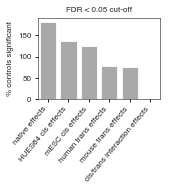

In [41]:
fig, ax = plt.subplots(figsize=(2.2, 1.5), nrows=1, ncols=1)

sns.barplot(data=n_sig_models, x="model", y="n_sig", color="darkgray", ax=ax)
ax.set_xlabel("")
ax.set_ylabel("% controls significant")
_ = ax.set_xticklabels(n_sig_models["model"], rotation=50, ha="right", va="top")

ax.set_title("FDR < 0.05 cut-off")
fig.savefig("perc_ctrls_sig.05.pdf", dpi="figure", bbox_inches="tight")

now always cut off at the 10th percentile of FDRs of controls within a given model

In [42]:
NATIVE_THRESH = np.percentile(native_ctrls["fdr_native"], 5)
NATIVE_THRESH

1.0898206312680145e-06

In [43]:
CIS_HUES64_THRESH = np.percentile(cis_HUES64_ctrls["fdr_cis_HUES64"], 5)
CIS_HUES64_THRESH

1.8999985664019451e-05

In [44]:
CIS_MESC_THRESH = np.percentile(cis_mESC_ctrls["fdr_cis_mESC"], 5)
CIS_MESC_THRESH

0.00014680699049394292

In [45]:
TRANS_HUMAN_THRESH = np.percentile(trans_human_ctrls["fdr_trans_human"], 5)
TRANS_HUMAN_THRESH

0.0043537916079706166

In [46]:
TRANS_MOUSE_THRESH = np.percentile(trans_mouse_ctrls["fdr_trans_mouse"], 5)
TRANS_MOUSE_THRESH

0.0021730207540922755

In [47]:
INT_THRESH = np.percentile(cis_trans_int_ctrls["fdr_int"], 5)
INT_THRESH

0.83542370624282325

now re-plot with threshold

In [48]:
n_sig_models = {}
for model, df, fdr, thresh in zip(["native effects", "HUES64 cis effects", "mESC cis effects", "human trans effects",
                                   "mouse trans effects", "cis/trans interaction effects"],
                                  [native_ctrls, cis_HUES64_ctrls, cis_mESC_ctrls, trans_human_ctrls, 
                                   trans_mouse_ctrls, cis_trans_int_ctrls],
                                  ["fdr_native", "fdr_cis_HUES64", "fdr_cis_mESC", "fdr_trans_human", 
                                   "fdr_trans_mouse", "fdr_int"],
                                  [NATIVE_THRESH, CIS_HUES64_THRESH, CIS_MESC_THRESH, TRANS_HUMAN_THRESH,
                                   TRANS_MOUSE_THRESH, 0.05]):
    n_sig = len(df[df[fdr] < thresh])
    n_sig_models[model] = [n_sig]
n_sig_models = pd.DataFrame.from_dict(n_sig_models, orient="index").reset_index()
n_sig_models.columns = ["model", "n_sig"]
n_sig_models

,model,n_sig
0,native effects,20
1,HUES64 cis effects,20
2,mESC cis effects,20
3,human trans effects,20
4,mouse trans effects,20
5,cis/trans interaction effects,0


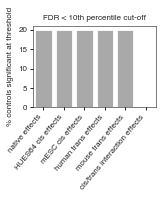

In [49]:
fig, ax = plt.subplots(figsize=(2.2, 1.5), nrows=1, ncols=1)

sns.barplot(data=n_sig_models, x="model", y="n_sig", color="darkgray", ax=ax)
ax.set_xlabel("")
ax.set_ylabel("% controls significant at threshold")
_ = ax.set_xticklabels(n_sig_models["model"], rotation=50, ha="right", va="top")

ax.set_title("FDR < 10th percentile cut-off")
fig.savefig("perc_ctrls_sig.thresh.pdf", dpi="figure", bbox_inches="tight")

## 5. plot controls vs. TSSs for each model

control boxplots

2.42257755144e-34


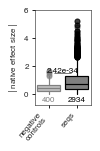

9.47205852332e-55


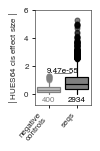

2.13742891334e-47


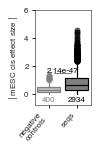

0.017860569207


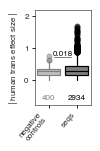

0.000507535765034


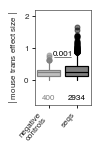

2.28590122864e-83


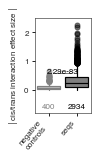

In [50]:
order = ["control", "TSS"]
pal = {"control": "gray", "TSS": "black"}

models = ["native", "HUES64 cis", "mESC cis", "human trans", "mouse trans", "cis/trans interaction"]
dfs = [native, HUES64_cis, mESC_cis, human_trans, mouse_trans, cis_trans_int]
logFCs = ["logFC_native", "logFC_cis_HUES64", "logFC_cis_mESC", "logFC_trans_human", "logFC_trans_mouse", "logFC_int"]
labels = ["native", "cis_HUES64", "cis_mESC", "trans_human", "trans_mouse", "cis_trans_int"]
ylims = [(-0.8, 6), (-0.8, 6), (-0.8, 6), (-0.8, 2.2), (-0.8, 2.2), (-0.8, 2.5)]
pxs = [(1.5, 1.4), (1.5, 1.4), (1.5, 1.4), (0.7, 0.7), (0.7, 0.7), (0.6, 0.5)]


for model, df, logFC, label, ylim, px in zip(models, dfs, logFCs, labels, ylims, pxs):
    df["is_ctrl"] = df.apply(is_ctrl, axis=1)
    df["abs_logFC"] = np.abs(df[logFC])
    
    fig = plt.figure(figsize=(1, 1.75))
    ax = sns.boxplot(data=df, x="is_ctrl", y="abs_logFC", flierprops = dict(marker='o', markersize=5), 
                     order=order, palette=pal)
    mimic_r_boxplot(ax)

    ax.set_xticklabels(["negative\ncontrols", "seqs"], rotation=50, ha='right', va='top')
    ax.set_xlabel("")
    ax.set_ylabel(r'$\vert$ %s effect size $\vert$' % model)

    for i, l in enumerate(order):
        n = len(df[df["is_ctrl"] == l])
        color = pal[l]
        ax.annotate(str(n), xy=(i, -0.7), xycoords="data", xytext=(0, 0), 
                    textcoords="offset pixels", ha='center', va='bottom', 
                    color=color, size=fontsize)

    ax.set_ylim(ylim)

    # calc p-vals b/w dists
    dist1 = np.asarray(df[df["is_ctrl"] == "control"]["abs_logFC"])
    dist2 = np.asarray(df[df["is_ctrl"] != "control"]["abs_logFC"])

    dist1 = dist1[~np.isnan(dist1)]
    dist2 = dist2[~np.isnan(dist2)]

    u, pval = stats.mannwhitneyu(dist1, dist2, alternative="two-sided", use_continuity=False)
    print(pval)

    annotate_pval(ax, 0.2, 0.8, px[0], 0, px[1], pval, fontsize)
    plt.show()
    fig.savefig("%s_ctrl_effectsize_boxplot.pdf" % label, dpi="figure", bbox_inches="tight")
    plt.close()

volcano plots

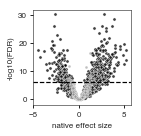

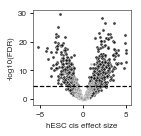

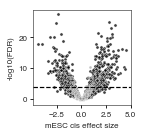

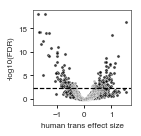

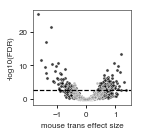

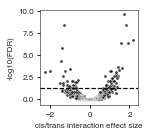

In [51]:
threshs = [NATIVE_THRESH, CIS_HUES64_THRESH, CIS_MESC_THRESH, TRANS_HUMAN_THRESH, TRANS_MOUSE_THRESH, 0.05]
fdrs = ["fdr_native", "fdr_cis_HUES64", "fdr_cis_mESC", "fdr_trans_human", "fdr_trans_mouse", "fdr_int"]

for model, df, logFC, fdr, label, thresh in zip(models, dfs, logFCs, fdrs, labels, threshs):
    df["is_ctrl"] = df.apply(is_ctrl, axis=1)
    
    neg_ctrls = df[df["is_ctrl"] == "control"]
    tss = df[df["is_ctrl"] != "control"]
    
    fig, ax = plt.subplots(figsize=(1.75, 1.75), nrows=1, ncols=1)

    ax.scatter(tss[logFC], -np.log10(tss[fdr]), s=10, alpha=0.75, 
               color="black", linewidths=0.5, edgecolors="white")
    ax.scatter(neg_ctrls[logFC], -np.log10(neg_ctrls[fdr]), s=8, alpha=0.5, 
               color="gray", linewidths=0.5, edgecolors="white")

    plt.xlabel("%s effect size" % model)
    if model == "HUES64 cis":
        plt.xlabel("hESC cis effect size")
    plt.ylabel("-log10(FDR)")
    ax.axhline(y=-np.log10(thresh), color="black", linestyle="dashed")

    plt.show()
    fig.savefig("%s_volcano.ctrls_highlighted.pdf" % label, dpi="figure", bbox_inches="tight")
    plt.close()

# controls > 0: 227, < 0: 173
# TSSs > 0: 1773, < 0: 1161


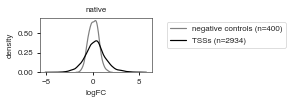

# controls > 0: 214, < 0: 186
# TSSs > 0: 1551, < 0: 1383


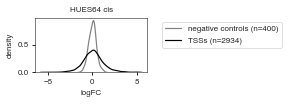

# controls > 0: 200, < 0: 200
# TSSs > 0: 1561, < 0: 1373


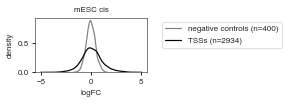

# controls > 0: 293, < 0: 107
# TSSs > 0: 2037, < 0: 897


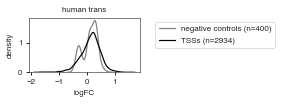

# controls > 0: 285, < 0: 115
# TSSs > 0: 2052, < 0: 882


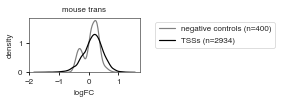

# controls > 0: 169, < 0: 231
# TSSs > 0: 1524, < 0: 1410


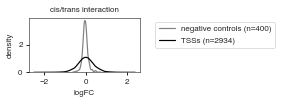

In [52]:
for model, df, logFC, fdr, label, thresh in zip(models, dfs, logFCs, fdrs, labels, threshs):
    df["is_ctrl"] = df.apply(is_ctrl, axis=1)
    
    neg_ctrls = df[df["is_ctrl"] == "control"]
    tss = df[df["is_ctrl"] != "control"]
    
    print("# controls > 0: %s, < 0: %s" % (len(neg_ctrls[neg_ctrls[logFC] > 0]), len(neg_ctrls[neg_ctrls[logFC] < 0])))
    print("# TSSs > 0: %s, < 0: %s" % (len(tss[tss[logFC] > 0]), len(tss[tss[logFC] < 0])))
    
    fig, ax = plt.subplots(figsize=(2, 1), nrows=1, ncols=1)
    
    sns.distplot(neg_ctrls[logFC], color="gray", label="negative controls (n=%s)" % len(neg_ctrls), hist=False, ax=ax)
    sns.distplot(tss[logFC], color="black", label="TSSs (n=%s)" % len(tss), hist=False, ax=ax) 
    
    ax.set_xlabel("logFC")
    ax.set_ylabel("density")
    ax.set_title(model)
    
    plt.legend(loc=2, bbox_to_anchor=(1.1, 1))
    
    plt.show()
    #fig.savefig("%s_ctrl_logFC.pdf" % label, dpi="figure", bbox_inches="tight")
    plt.close()

## 6. split result file indeces

In [53]:
native["hg19_id"] = native["index"].str.split("__", expand=True)[0]
native["biotype_hg19"] = native["index"].str.split("__", expand=True)[1]
native["mm9_id"] = native["index"].str.split("__", expand=True)[2]
native["biotype_mm9"] = native["index"].str.split("__", expand=True)[3]
native["tss_tile_num"] = native["index"].str.split("__", expand=True)[4]

In [54]:
HUES64_cis["hg19_id"] = HUES64_cis["index"].str.split("__", expand=True)[0]
HUES64_cis["biotype_hg19"] = HUES64_cis["index"].str.split("__", expand=True)[1]
HUES64_cis["mm9_id"] = HUES64_cis["index"].str.split("__", expand=True)[2]
HUES64_cis["biotype_mm9"] = HUES64_cis["index"].str.split("__", expand=True)[3]
HUES64_cis["tss_tile_num"] = HUES64_cis["index"].str.split("__", expand=True)[4]

In [55]:
mESC_cis["hg19_id"] = mESC_cis["index"].str.split("__", expand=True)[0]
mESC_cis["biotype_hg19"] = mESC_cis["index"].str.split("__", expand=True)[1]
mESC_cis["mm9_id"] = mESC_cis["index"].str.split("__", expand=True)[2]
mESC_cis["biotype_mm9"] = mESC_cis["index"].str.split("__", expand=True)[3]
mESC_cis["tss_tile_num"] = mESC_cis["index"].str.split("__", expand=True)[4]

In [56]:
human_trans["hg19_id"] = human_trans["index"].str.split("__", expand=True)[0]
human_trans["biotype_hg19"] = human_trans["index"].str.split("__", expand=True)[1]
human_trans["mm9_id"] = human_trans["index"].str.split("__", expand=True)[2]
human_trans["biotype_mm9"] = human_trans["index"].str.split("__", expand=True)[3]
human_trans["tss_tile_num"] = human_trans["index"].str.split("__", expand=True)[4]

In [57]:
mouse_trans["hg19_id"] = mouse_trans["index"].str.split("__", expand=True)[0]
mouse_trans["biotype_hg19"] = mouse_trans["index"].str.split("__", expand=True)[1]
mouse_trans["mm9_id"] = mouse_trans["index"].str.split("__", expand=True)[2]
mouse_trans["biotype_mm9"] = mouse_trans["index"].str.split("__", expand=True)[3]
mouse_trans["tss_tile_num"] = mouse_trans["index"].str.split("__", expand=True)[4]

In [58]:
cis_trans_int["hg19_id"] = cis_trans_int["index"].str.split("__", expand=True)[0]
cis_trans_int["biotype_hg19"] = cis_trans_int["index"].str.split("__", expand=True)[1]
cis_trans_int["mm9_id"] = cis_trans_int["index"].str.split("__", expand=True)[2]
cis_trans_int["biotype_mm9"] = cis_trans_int["index"].str.split("__", expand=True)[3]
cis_trans_int["tss_tile_num"] = cis_trans_int["index"].str.split("__", expand=True)[4]

## 7. merge result files w/ activity data

In [59]:
len(data)

2952

In [60]:
tmp = data.merge(native[["hg19_id", "mm9_id", "tss_tile_num", "logFC_native", "fdr_native"]], 
                 on=["hg19_id", "mm9_id", "tss_tile_num"], how="right")
len(tmp)

3352

In [61]:
tmp = tmp.merge(HUES64_cis[["hg19_id", "mm9_id", "tss_tile_num", "logFC_cis_HUES64", "fdr_cis_HUES64"]], 
                on=["hg19_id", "mm9_id", "tss_tile_num"], how="right")
len(tmp)

3352

In [62]:
tmp = tmp.merge(mESC_cis[["hg19_id", "mm9_id", "tss_tile_num", "logFC_cis_mESC", "fdr_cis_mESC"]], 
                on=["hg19_id", "mm9_id", "tss_tile_num"], how="right")
len(tmp)

3352

In [63]:
tmp = tmp.merge(human_trans[["hg19_id", "mm9_id", "tss_tile_num", "logFC_trans_human", "fdr_trans_human"]], 
                on=["hg19_id", "mm9_id", "tss_tile_num"], how="right")
len(tmp)

3352

In [64]:
tmp = tmp.merge(mouse_trans[["hg19_id", "mm9_id", "tss_tile_num", "logFC_trans_mouse", "fdr_trans_mouse"]], 
                on=["hg19_id", "mm9_id", "tss_tile_num"], how="right")
len(tmp)

3352

In [65]:
tmp = tmp.merge(cis_trans_int[["hg19_id", "mm9_id", "tss_tile_num", "logFC_int", "fdr_int"]], 
                on=["hg19_id", "mm9_id", "tss_tile_num"], how="right")
print(len(tmp))
tmp.sample(5)

3352


,hg19_id,chr_tss_hg19,start_tss_hg19,biotype_hg19,minimal_biotype_hg19,cage_id_hg19,name_peak_hg19,stem_exp_hg19,max_cage_hg19,mm9_id,...,logFC_cis_HUES64,fdr_cis_HUES64,logFC_cis_mESC,fdr_cis_mESC,logFC_trans_human,fdr_trans_human,logFC_trans_mouse,fdr_trans_mouse,logFC_int,fdr_int
2942,h.3568,chr4,151102841.0,no cage activity,no CAGE activity,no cage activity,no cage activity,no cage activity,1.0,m.3378,...,1.724931,2.010247e-09,1.776946,7.576245e-10,0.579945,0.060932,0.640718,0.000094,0.099626,0.991115
1570,h.2511,chr16,53124972.0,enhancer,eRNA,chr16:53124874-53125001,chr16:53124874-53125001__POSITIVE,0.0287066,177.0,m.2323,...,-0.723110,1.781123e-02,-0.218478,5.215866e-01,-0.401297,0.082221,0.139765,0.609758,0.585777,0.482010
2858,h.3092,chr17,47964814.0,no cage activity,no CAGE activity,no cage activity,no cage activity,no cage activity,5.0,m.2903,...,-0.876929,8.523096e-05,-0.997746,1.237634e-05,0.344922,0.087566,0.161653,0.578726,-0.066833,0.991115
999,h.1550,chr12,76425020.0,antisense,other,"chr12:76425003..76425035,+",ENSG00000257453.1,0.154444,755.0,m.1362,...,-0.456065,5.831487e-02,-0.252783,2.977530e-01,0.026434,0.894621,0.140834,0.610544,0.168460,0.963892
1820,h.2786,chr18,3448180.0,no cage activity,lncRNA,no cage activity,no cage activity,no cage activity,274.0,m.2597,...,0.314288,3.774923e-01,0.526971,1.553810e-01,-0.265220,0.409422,-0.159394,0.577851,0.120291,0.991115


In [66]:
data = tmp.copy()

In [67]:
data.columns

Index(['hg19_id', 'chr_tss_hg19', 'start_tss_hg19', 'biotype_hg19',
       'minimal_biotype_hg19', 'cage_id_hg19', 'name_peak_hg19',
       'stem_exp_hg19', 'max_cage_hg19', 'mm9_id', 'chr_tss_mm9',
       'start_tss_mm9', 'biotype_mm9', 'minimal_biotype_mm9', 'cage_id_mm9',
       'name_peak_mm9', 'stem_exp_mm9', 'max_cage_mm9', 'tss_tile_num',
       'orig_species', 'biotype_switch_minimal', 'HUES64_hg19', 'mESC_hg19',
       'HUES64_mm9', 'mESC_mm9', 'HUES64_padj_hg19', 'mESC_padj_hg19',
       'HUES64_padj_mm9', 'mESC_padj_mm9', 'logFC_native', 'fdr_native',
       'logFC_cis_HUES64', 'fdr_cis_HUES64', 'logFC_cis_mESC', 'fdr_cis_mESC',
       'logFC_trans_human', 'fdr_trans_human', 'logFC_trans_mouse',
       'fdr_trans_mouse', 'logFC_int', 'fdr_int'],
      dtype='object')

## 8. classify comparison effects as sig vs. not sig

In [68]:
data["native_status"] = data.apply(comp_status, fdr_col="fdr_native", thresh=NATIVE_THRESH, txt="native", axis=1)
data["cis_HUES64_status"] = data.apply(comp_status, fdr_col="fdr_cis_HUES64", thresh=CIS_HUES64_THRESH, 
                                       txt="cis", axis=1)
data["cis_mESC_status"] = data.apply(comp_status, fdr_col="fdr_cis_mESC", thresh=CIS_MESC_THRESH, txt="cis", axis=1)
data["trans_human_status"] = data.apply(comp_status, fdr_col="fdr_trans_human", thresh=TRANS_HUMAN_THRESH,
                                        txt="trans", axis=1)
data["trans_mouse_status"] = data.apply(comp_status, fdr_col="fdr_trans_mouse", thresh=TRANS_MOUSE_THRESH,
                                        txt="trans", axis=1)
data["cis_trans_int_status"] = data.apply(comp_status, fdr_col="fdr_int", thresh=0.05, txt="cis/trans int.", axis=1)

In [69]:
# data["native_status"] = data.apply(comp_status, fdr_col="fdr_native", thresh=0.05, txt="native", axis=1)
# data["cis_HUES64_status"] = data.apply(comp_status, fdr_col="fdr_cis_HUES64", thresh=0.05, 
#                                        txt="cis", axis=1)
# data["cis_mESC_status"] = data.apply(comp_status, fdr_col="fdr_cis_mESC", thresh=0.05, txt="cis", axis=1)
# data["trans_human_status"] = data.apply(comp_status, fdr_col="fdr_trans_human", thresh=0.05,
#                                         txt="trans", axis=1)
# data["trans_mouse_status"] = data.apply(comp_status, fdr_col="fdr_trans_mouse", thresh=0.05,
#                                         txt="trans", axis=1)
# data["cis_trans_int_status"] = data.apply(comp_status, fdr_col="fdr_int", thresh=0.05, txt="cis/trans int.", axis=1)

In [70]:
data.sample(5)

,hg19_id,chr_tss_hg19,start_tss_hg19,biotype_hg19,minimal_biotype_hg19,cage_id_hg19,name_peak_hg19,stem_exp_hg19,max_cage_hg19,mm9_id,...,logFC_trans_mouse,fdr_trans_mouse,logFC_int,fdr_int,native_status,cis_HUES64_status,cis_mESC_status,trans_human_status,trans_mouse_status,cis_trans_int_status
1873,h.2883,chr2,26100437.0,no cage activity,other,no cage activity,no cage activity,no cage activity,162.0,m.2694,...,-0.727366,0.000057,-0.443259,0.440107,significant native effect,no cis effect,significant cis effect,no trans effect,significant trans effect,no cis/trans int. effect
2644,h.1857,chr21,46221794.0,divergent,lncRNA,"chr21:46221779..46221809,+",ENSG00000236519.1,0.946667,1198.0,m.1669,...,-0.434697,0.035701,-0.964024,0.146544,significant native effect,significant cis effect,no cis effect,no trans effect,no trans effect,no cis/trans int. effect
2016,h.3121,chr1,22352413.0,no cage activity,lncRNA,no cage activity,no cage activity,no cage activity,39.0,m.2932,...,0.060077,0.808415,0.091591,0.991115,no native effect,no cis effect,no cis effect,no trans effect,no trans effect,no cis/trans int. effect
1581,h.2531,chr2,151719496.0,enhancer,eRNA,chr2:151719468-151719497,chr2:151719468-151719497__POSITIVE,0.039043800000000004,6.0,m.2343,...,0.377546,0.263144,-0.310770,0.900129,no native effect,no cis effect,no cis effect,no trans effect,no trans effect,no cis/trans int. effect
1312,h.2087,chr11,65266063.0,intergenic,lncRNA,"chr11:65266057..65266080,+",ENSG00000251562.3,0.028888900000000002,297.0,m.1899,...,-0.004035,0.983580,0.239466,0.905592,no native effect,no cis effect,no cis effect,no trans effect,no trans effect,no cis/trans int. effect


## 9. compare l2fcs for elements called significant for each biotype & re-classify

In [71]:
min_order = ["no CAGE activity", "eRNA", "lncRNA", "mRNA", "other"]
palette = sns.husl_palette(n_colors=len(min_order))

0.634655810316


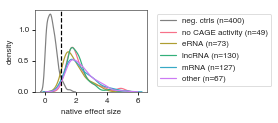

0.618433199293


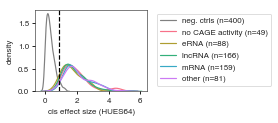

0.440755598097


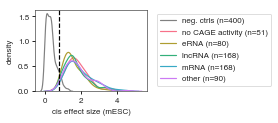

0.292565645359


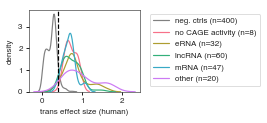

0.341798075047


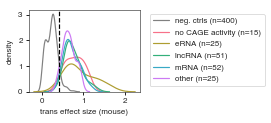

nan


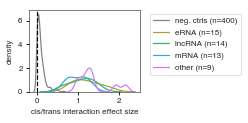

In [72]:
l2fc_cols = ["logFC_native", "logFC_cis_HUES64", "logFC_cis_mESC", "logFC_trans_human", "logFC_trans_mouse", 
             "logFC_int"]
sig_cols = ["native_status", "cis_HUES64_status", "cis_mESC_status", "trans_human_status", "trans_mouse_status",
            "cis_trans_int_status"]
xlabels = ["native effect size", "cis effect size (HUES64)", "cis effect size (mESC)", "trans effect size (human)",
           "trans effect size (mouse)", "cis/trans interaction effect size"]
xs = [1, 0.9, 0.8, 0.4, 0.4, 0]
min_vals = []

for l2fc_col, sig_col, xlabel, x in zip(l2fc_cols, sig_cols, xlabels, xs):
    
    fig, ax = plt.subplots(figsize=(2, 1.5), nrows=1, ncols=1)
    filt = data[((data["HUES64_padj_hg19"] < QUANT_ALPHA) | (data["mESC_padj_mm9"] < QUANT_ALPHA))]
    ctrls = np.abs(data[data["hg19_id"].str.contains("ctrl.")][l2fc_col])
    
    sig_ctrls = data[(data["hg19_id"].str.contains("ctrl.")) & (data[sig_col].str.contains("significant"))][l2fc_col]
    min_val = np.min(np.abs(sig_ctrls))
    print(min_val)
    min_vals.append(min_val)
    
    sns.distplot(ctrls, hist=False, color="gray", label="neg. ctrls (n=%s)" % len(ctrls), ax=ax)
    
    sub = filt[~filt[sig_col].str.contains("no ")]
    for i, label in enumerate(min_order):
        
        vals = np.abs(sub[sub["minimal_biotype_hg19"] == label][l2fc_col])
        sns.distplot(vals, hist=False, color=palette[i], label="%s (n=%s)" % (label, len(vals)), ax=ax)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel("density")
    ax.axvline(x=x, linestyle="dashed", color="black")
    plt.legend(loc=2, bbox_to_anchor=(1.05, 1))
    plt.show()
    plt.close()

In [73]:
data.native_status.value_counts()

no native effect             2757
significant native effect     595
Name: native_status, dtype: int64

In [74]:
data["native_status"] = data.apply(comp_status_stringent, status_col="native_status", 
                                   l2fc_col="logFC_native", l2fc_thresh=min_vals[0], txt="native", axis=1)
data["cis_HUES64_status"] = data.apply(comp_status_stringent, status_col="cis_HUES64_status",  
                                       l2fc_col="logFC_cis_HUES64", l2fc_thresh=min_vals[1], txt="cis", axis=1)
data["cis_mESC_status"] = data.apply(comp_status_stringent, status_col="cis_mESC_status", 
                                     l2fc_col="logFC_cis_mESC", l2fc_thresh=min_vals[2], txt="cis", axis=1)
data["trans_human_status"] = data.apply(comp_status_stringent, status_col="trans_human_status", 
                                        l2fc_col="logFC_trans_human", l2fc_thresh=min_vals[3], txt="trans", axis=1)
data["trans_mouse_status"] = data.apply(comp_status_stringent, status_col="trans_mouse_status", 
                                        l2fc_col="logFC_trans_mouse", l2fc_thresh=min_vals[4], txt="trans", axis=1)
data["cis_trans_int_status"] = data.apply(comp_status_stringent, status_col="cis_trans_int_status", 
                                          l2fc_col="logFC_int", l2fc_thresh=0, txt="cis/trans int.", axis=1)

In [75]:
data.native_status.value_counts()

no native effect             2759
significant native effect     593
Name: native_status, dtype: int64

## 9. classify effects as higher in mouse or human

In [76]:
data["native_status_det"] = data.apply(comp_status_detail, status_col="native_status",
                                       logFC_col="logFC_native", txt="native", axis=1)
data["cis_HUES64_status_det"] = data.apply(comp_status_detail, status_col="cis_HUES64_status",
                                           logFC_col="logFC_cis_HUES64", txt="cis", axis=1)
data["cis_mESC_status_det"] = data.apply(comp_status_detail, status_col="cis_mESC_status",
                                         logFC_col="logFC_cis_mESC", txt="cis", axis=1)
data["trans_human_status_det"] = data.apply(comp_status_detail, status_col="trans_human_status",
                                            logFC_col="logFC_trans_human", txt="trans", axis=1)
data["trans_mouse_status_det"] = data.apply(comp_status_detail, status_col="trans_mouse_status",
                                            logFC_col="logFC_trans_mouse", txt="trans", axis=1)
data["cis_trans_int_status_det"] = data.apply(comp_status_detail, status_col="cis_trans_int_status", 
                                              logFC_col="logFC_int", txt="cis/trans int.", axis=1)

In [77]:
data.sample(5)

,hg19_id,chr_tss_hg19,start_tss_hg19,biotype_hg19,minimal_biotype_hg19,cage_id_hg19,name_peak_hg19,stem_exp_hg19,max_cage_hg19,mm9_id,...,cis_mESC_status,trans_human_status,trans_mouse_status,cis_trans_int_status,native_status_det,cis_HUES64_status_det,cis_mESC_status_det,trans_human_status_det,trans_mouse_status_det,cis_trans_int_status_det
862,h.1508,chr11,119562947.0,enhancer,eRNA,chr11:119562613-119562997,chr11:119562613-119562997__POSITIVE,0.0,12.0,m.1190,...,significant cis effect,no trans effect,significant trans effect,no cis/trans int. effect,native effect\n(higher in mouse),cis effect\n(higher in mouse),cis effect\n(higher in mouse),no trans effect,trans effect\n(higher in mouse),no cis/trans int. effect
1619,h.3606,chr11,124617024.0,unassigned,other,"chr11:124617020..124617061,+",unassigned,0.0422222,216.0,m.3415,...,no cis effect,no trans effect,significant trans effect,no cis/trans int. effect,no native effect,no cis effect,no cis effect,no trans effect,trans effect\n(higher in mouse),no cis/trans int. effect
89,h.151,chr17,37081824.0,intergenic,other,"chr17:37081817..37081833,+",ENSG00000263874.1,0.245556,2118.0,m.95,...,no cis effect,no trans effect,significant trans effect,no cis/trans int. effect,no native effect,cis effect\n(higher in mouse),no cis effect,no trans effect,trans effect\n(higher in human),no cis/trans int. effect
917,h.1415,chr6,32076157.0,enhancer,eRNA,chr6:32075999-32076179,chr6:32075999-32076179__POSITIVE,0.0,37.0,m.1262,...,no cis effect,no trans effect,no trans effect,no cis/trans int. effect,no native effect,no cis effect,no cis effect,no trans effect,no trans effect,no cis/trans int. effect
846,h.1304,chr11,19737103.0,enhancer,eRNA,chr11:19736892-19737150,chr11:19736892-19737150__NEGATIVE,0.0,23.0,m.1176,...,no cis effect,no trans effect,no trans effect,no cis/trans int. effect,no native effect,no cis effect,no cis effect,no trans effect,no trans effect,no cis/trans int. effect


## 10. classify cis & trans effects into one effect (since we measured in 2 contexts)

In [78]:
data["cis_status_one"] = data.apply(comp_status_one, status_col1="cis_HUES64_status", 
                                    status_col2="cis_mESC_status", txt="cis", axis=1)
data["trans_status_one"] = data.apply(comp_status_one, status_col1="trans_human_status", 
                                      status_col2="trans_mouse_status", txt="trans", axis=1)

In [79]:
data["cis_status_det_one"] = data.apply(comp_status_detail_one, status_col1="cis_HUES64_status", 
                                        status_col2="cis_mESC_status", logFC_col1="logFC_cis_HUES64", 
                                        logFC_col2="logFC_cis_mESC", txt="cis", axis=1)
data["trans_status_det_one"] = data.apply(comp_status_detail_one, status_col1="trans_human_status", 
                                          status_col2="trans_mouse_status", logFC_col1="logFC_trans_human", 
                                          logFC_col2="logFC_trans_mouse", txt="trans", axis=1)

In [80]:
data["logFC_cis_one"] = data.apply(comp_logFC_one, status_col1="cis_HUES64_status", status_col2="cis_mESC_status",
                                   logFC_col1="logFC_cis_HUES64", logFC_col2="logFC_cis_mESC", axis=1)
data["logFC_trans_one"] = data.apply(comp_logFC_one, status_col1="trans_human_status", status_col2="trans_mouse_status",
                                     logFC_col1="logFC_trans_human", logFC_col2="logFC_trans_mouse", axis=1)

## 11. print numbers with each effect

In [81]:
# remove ctrls
data = data[~data["hg19_id"].str.contains("ctrl")]
len(data)

2952

## native

In [82]:
data.native_status.value_counts()

no native effect             2378
significant native effect     574
Name: native_status, dtype: int64

## cis - HUES64

In [83]:
data.cis_HUES64_status.value_counts()

no cis effect             2207
significant cis effect     745
Name: cis_HUES64_status, dtype: int64

## cis - mESC

In [84]:
data.cis_mESC_status.value_counts()

no cis effect             2227
significant cis effect     725
Name: cis_mESC_status, dtype: int64

## trans - human

In [85]:
data.trans_human_status.value_counts()

no trans effect             2745
significant trans effect     207
Name: trans_human_status, dtype: int64

## trans - mouse

In [86]:
data.trans_mouse_status.value_counts()

no trans effect             2755
significant trans effect     197
Name: trans_mouse_status, dtype: int64

## cis/trans interactions

In [87]:
data.cis_trans_int_status.value_counts()

no cis/trans int. effect             2887
significant cis/trans int. effect      65
Name: cis_trans_int_status, dtype: int64

In [88]:
np.max(np.abs(data[data["trans_mouse_status"].str.contains("significant")]["fdr_trans_mouse"]))

0.00217233026378945

## 12. write files

In [89]:
# rearrange columns for readability
data = data[['hg19_id', 'chr_tss_hg19', 'start_tss_hg19', 'biotype_hg19', 'cage_id_hg19', 'name_peak_hg19', 
             'minimal_biotype_hg19', 'stem_exp_hg19', 'mm9_id', 'chr_tss_mm9', 
             'start_tss_mm9', 'biotype_mm9', 'cage_id_mm9', 'name_peak_mm9', 
             'minimal_biotype_mm9', 'stem_exp_mm9', 'tss_tile_num', 'orig_species',  
             'biotype_switch_minimal', 'HUES64_hg19', 'mESC_hg19', 'HUES64_mm9', 'mESC_mm9', 'HUES64_padj_hg19', 
             'mESC_padj_hg19', 'HUES64_padj_mm9', 'mESC_padj_mm9', 'logFC_native', 'fdr_native', 'native_status', 
             'native_status_det', 'logFC_cis_HUES64', 'fdr_cis_HUES64', 'logFC_cis_mESC', 'fdr_cis_mESC',  
             'cis_HUES64_status', 'cis_mESC_status', 'cis_HUES64_status_det', 'cis_mESC_status_det', 'cis_status_one', 
             'cis_status_det_one', 'logFC_cis_one', 'logFC_trans_human', 'fdr_trans_human', 'logFC_trans_mouse', 
             'fdr_trans_mouse', 'trans_human_status', 'trans_mouse_status', 'trans_human_status_det', 
             'trans_mouse_status_det',  'trans_status_one', 'trans_status_det_one', 'logFC_trans_one',  'logFC_int', 
             'fdr_int', 'cis_trans_int_status', 'cis_trans_int_status_det']]

In [90]:
len(data)

2952

In [91]:
data.head()

,hg19_id,chr_tss_hg19,start_tss_hg19,biotype_hg19,cage_id_hg19,name_peak_hg19,minimal_biotype_hg19,stem_exp_hg19,mm9_id,chr_tss_mm9,...,trans_mouse_status,trans_human_status_det,trans_mouse_status_det,trans_status_one,trans_status_det_one,logFC_trans_one,logFC_int,fdr_int,cis_trans_int_status,cis_trans_int_status_det
0,h.2,chr1,2985430.0,divergent,"chr1:2985420..2985438,-",ENSG00000177133.6,lncRNA,0.07111110000000001,m.1,chr4,...,no trans effect,no trans effect,no trans effect,no trans effect,no trans effect,-0.325920,-0.050780,0.991115,no cis/trans int. effect,no cis/trans int. effect
1,h.3,chr1,8086552.0,divergent,"chr1:8086546..8086571,+",ENSG00000238290.1,lncRNA,0.10444400000000001,m.2,chr4,...,no trans effect,no trans effect,no trans effect,no trans effect,no trans effect,0.533476,-0.405629,0.908445,no cis/trans int. effect,no cis/trans int. effect
2,h.4,chr1,26498322.0,antisense,"chr1:26498321..26498327,-",ENSG00000236782.1,other,0.03,m.3,chr4,...,no trans effect,no trans effect,no trans effect,no trans effect,no trans effect,0.270223,-0.210732,0.960813,no cis/trans int. effect,no cis/trans int. effect
3,h.5,chr1,65533428.0,intergenic,"chr1:65533390..65533443,-",ENSG00000231485.1,lncRNA,0.841111,m.4,chr4,...,no trans effect,trans effect\n(higher in mouse),no trans effect,significant trans effect,trans effect\n(higher in mouse),0.449668,-0.740913,0.152051,no cis/trans int. effect,no cis/trans int. effect
4,h.6,chr1,65533462.0,intergenic,"chr1:65533457..65533465,-",ENSG00000231485.1,lncRNA,0.116667,m.4,chr4,...,no trans effect,no trans effect,no trans effect,no trans effect,no trans effect,-0.270646,-0.528464,0.379849,no cis/trans int. effect,no cis/trans int. effect


In [92]:
data.to_csv("../../../data/02__mpra/03__results/all_processed_results.txt", sep="\t", index=False)